## Hand drawing
In this section we are trying to find out 4 things:

1. Find the number of lines in each drawing.

2. Find length and average pressure of each line.

3. Find number of hand liftings.

4. Find whether each drawing is closed.

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from operator import index
import math

In [3]:
main = r'C:\Users\Maya\Desktop\train\7554\SimpleTest'

(925, 1381)


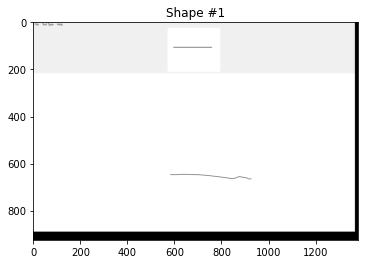

(925, 1381)


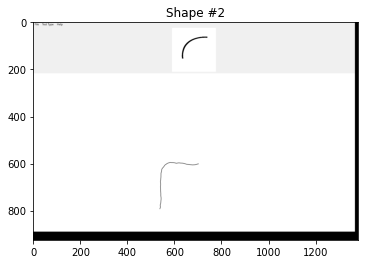

(925, 1381)


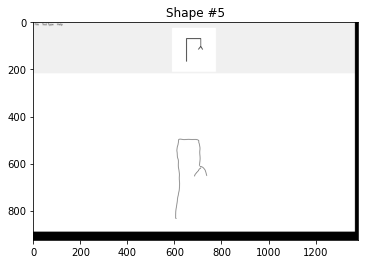

(925, 1381)


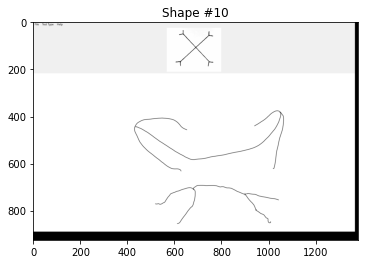

In [4]:
main = r'C:\Users\Maya\Desktop\train\7554\SimpleTest\1.png'
shape_1 = cv2.imread(main,0)
plt.imshow(shape_1 ,cmap = 'gist_gray')
plt.title('Shape #1')
print(shape_1.shape)
plt.show()

main = r'C:\Users\Maya\Desktop\train\7554\SimpleTest\2.png'
shape_2 = cv2.imread(main,0)
plt.imshow(shape_2 ,cmap = 'gist_gray')
plt.title('Shape #2')
print(shape_2.shape)
plt.show()

main = r'C:\Users\Maya\Desktop\train\7554\SimpleTest\5.png'
shape_5 = cv2.imread(main,0)
plt.imshow(shape_5 ,cmap = 'gist_gray')
plt.title('Shape #5')
print(shape_5.shape)
plt.show()

main = r'C:\Users\Maya\Desktop\train\7554\SimpleTest\10.png'
shape_10 = cv2.imread(main,0)
plt.imshow(shape_10 ,cmap = 'gist_gray')
plt.title('Shape #10')
print(shape_10.shape)
plt.show()

## Understanding our data

In order to explore our data, we choose drawing 13 as it is a closed shape with multipul lines and hand liftings.

In [5]:
df = pd.read_csv(r'C:\Users\Maya\Desktop\train\7554\SimpleTest\13.csv', sep =',')

In [6]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,713.411710359164,527.672941,0.290761,-4798.0,2043.0,00:13.4325736
1,713.780344150595,527.462294,0.295644,-4798.0,2043.0,00:13.4481964
2,714.780921584479,526.777688,0.295644,-4798.0,2043.0,00:13.4638099
3,716.782076452246,524.934519,0.208728,-4798.0,2043.0,00:13.4794442
4,717.098048273473,523.775956,0.208728,-4798.0,2043.0,00:13.4950665
...,...,...,...,...,...,...
1200,372.583439196212,294.064442,0.667231,-1988.0,1259.0,00:35.4089803
1201,376.480424991339,296.118258,0.608392,-1988.0,1259.0,00:35.4089803
1202,377.849636216653,296.750202,0.558099,-1988.0,1259.0,00:35.4089803
1203,Time Elapsed till drawing started: 00:13.4325736,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(df.index[[-1,-2]])

df

,X,Y,Pressure,TiltX,TiltY,Time
0,713.411710359164,527.672941,0.290761,-4798.0,2043.0,00:13.4325736
1,713.780344150595,527.462294,0.295644,-4798.0,2043.0,00:13.4481964
2,714.780921584479,526.777688,0.295644,-4798.0,2043.0,00:13.4638099
3,716.782076452246,524.934519,0.208728,-4798.0,2043.0,00:13.4794442
4,717.098048273473,523.775956,0.208728,-4798.0,2043.0,00:13.4950665
...,...,...,...,...,...,...
1198,367.159256265158,291.010047,0.733639,-1988.0,1259.0,00:35.3933225
1199,371.372213881511,293.379836,0.685542,-1988.0,1259.0,00:35.3933225
1200,372.583439196212,294.064442,0.667231,-1988.0,1259.0,00:35.4089803
1201,376.480424991339,296.118258,0.608392,-1988.0,1259.0,00:35.4089803


In [10]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [9]:
df['X'] = df['X'].astype(float)

In order to understand out data better we will use this annimation to understand exactly what each point in the table means:

We can see where the drawing begin, ends, where there's a hand lift.

<IPython.core.display.Javascript object>


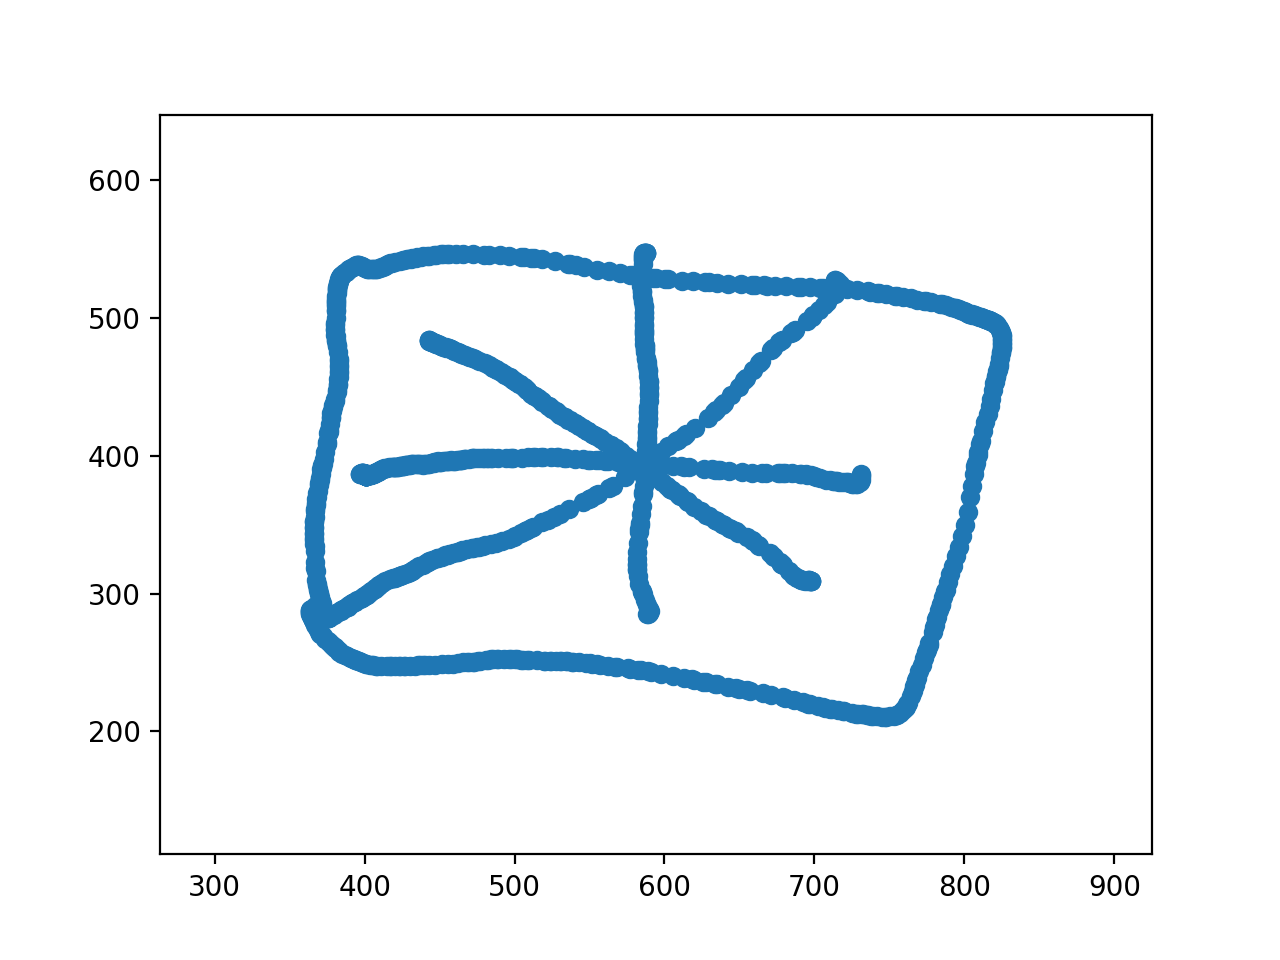

In [29]:
x = df['X']
y = df[' Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df[' Y'].min()-100 , df[' Y'].max() + 100)
graph, = plt.plot([], [], 'o')
graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(df), interval=1)
plt.show()

In [11]:
df.describe()

,X,Y,Pressure,TiltX,TiltY
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,534.162533,391.193733,0.564328,-3404.858687,1694.581879
std,139.300785,94.493909,0.176770,744.862702,845.336955
min,363.525580,210.700543,0.013901,-4798.000000,227.000000
25%,403.917311,311.679871,0.463127,-3964.000000,1063.000000
50%,501.552604,390.699157,0.568841,-3690.000000,1623.000000
75%,632.417600,475.484929,0.736080,-2914.000000,2424.500000
max,825.160411,547.368518,0.781979,-1988.000000,3224.000000


We learn that we have 1203 rows, therefore 1203 logs, the minimun x is 363.52 and minimum y is at 210.70, note that this does not mean that they are one point (not necessarily create a minimum point).

The x_std is larger than y_std which tells us that the same is more rectangular rather than a square.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1203 non-null   float64
 1    Y         1203 non-null   float64
 2    Pressure  1203 non-null   float64
 3    TiltX     1203 non-null   float64
 4    TiltY     1203 non-null   float64
 5    Time      1203 non-null   object 
dtypes: float64(5), object(1)
memory usage: 65.8+ KB


Note that there aren't any nulls in our data therefore we won't have to deal with that. If we did have any, we'd have to see in which columns they were and treat them differently as each column have different importance for each question.

In [14]:

    dist=[]
    for i in range(0,len(df)-1):
        dist.append(((df.iloc[i,0]-df.iloc[i+1,0])**2+(df.iloc[i,1]-df.iloc[i+1,1])**2)**0.5)
    dist.append(0)
    df['distance']=dist

In [15]:
df

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,713.411710,527.672941,0.290761,-4798.0,2043.0,00:13.4325736,0.424574
1,713.780344,527.462294,0.295644,-4798.0,2043.0,00:13.4481964,1.212370
2,714.780922,526.777688,0.295644,-4798.0,2043.0,00:13.4638099,2.720642
3,716.782076,524.934519,0.208728,-4798.0,2043.0,00:13.4794442,1.200878
4,717.098048,523.775956,0.208728,-4798.0,2043.0,00:13.4950665,1.273723
...,...,...,...,...,...,...,...
1198,367.159256,291.010047,0.733639,-1988.0,1259.0,00:35.3933225,4.833726
1199,371.372214,293.379836,0.685542,-1988.0,1259.0,00:35.3933225,1.391313
1200,372.583439,294.064442,0.667231,-1988.0,1259.0,00:35.4089803,4.405072
1201,376.480425,296.118258,0.608392,-1988.0,1259.0,00:35.4089803,1.508009


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1203 non-null   float64
 1    Y         1203 non-null   float64
 2    Pressure  1203 non-null   float64
 3    TiltX     1203 non-null   float64
 4    TiltY     1203 non-null   float64
 5    Time      1203 non-null   object 
 6   distance   1203 non-null   float64
dtypes: float64(6), object(1)
memory usage: 75.2+ KB


## Number of hand liftings

In [21]:
df[' Time'] = df[' Time'].str.slice(3).astype(float)

In [22]:
handLift = 0
i = 0
while i <(len(df)-2):
    i = i+1
    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.5):
        handLift = handLift+1
        print (i)
handLift

147
311
568
673


4

## Average length and pressure of each line

In [26]:
i = 0
k = 0
while i <(len(df)-2):
    i = i+1
    curFirst_x = df.iloc[k,0]
    curFirst_y = df.iloc[k,1]
    curLast_x = df.iloc[i,0]
    curLast_y = df.iloc[i,1]

    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.05):
        first_point = [curFirst_x,curFirst_y]
        last_point = [curLast_x,curLast_y]
        df_pressure = df.iloc[k:i,2:3]
        print("The average pressure is: ", df_pressure.mean())
        distance =df.iloc[k:i,6:7].sum()
        print ("The length of the line is:" ,distance)

        
        k = i+1
        
first_point = [curFirst_x,curFirst_y]
last_point = [curLast_x,curLast_y]
df_pressureLast = df.iloc[i:-1,2:3]
distanceLast = (df.iloc[i:-1,6:7]).sum()
print("average pressure is ", df_pressureLast.mean(), "and the length is:" , distanceLast)


The average pressure is:   Pressure    0.591696
dtype: float64
The length of the line is: distance    432.250921
dtype: float64
The average pressure is:   Pressure    0.277731
dtype: float64
The length of the line is: distance    312.855493
dtype: float64
The average pressure is:   Pressure    0.480879
dtype: float64
The length of the line is: distance    345.921935
dtype: float64
The average pressure is:   Pressure    0.498563
dtype: float64
The length of the line is: distance    266.715925
dtype: float64
average pressure is   Pressure    0.608392
dtype: float64 and the length is: distance    1.508009
dtype: float64


## Number of lines are there in the drawing

In [18]:
i = 0

average_y0 = (df.iloc[0+i,1]+ df.iloc[1+i,1]+df.iloc[2+i,1]+df.iloc[3+i,1]+df.iloc[4+i,1]+df.iloc[5+i,1]+df.iloc[6+i,1]+df.iloc[7+i,1]+df.iloc[8+i,1]+df.iloc[9+i,1])/10
average_y40 = (df.iloc[40+i,1]+ df.iloc[41+i,1]+df.iloc[42+i,1]+df.iloc[43+i,1]+df.iloc[44+i,1]+df.iloc[45+i,1]+df.iloc[46+i,1]+df.iloc[47+i,1]+df.iloc[48+i,1]+df.iloc[49+i,1])/10
average_x0 = (df.iloc[0+i,0]+ df.iloc[1+i,0]+df.iloc[2+i,0]+df.iloc[3+i,0]+df.iloc[4+i,0]+df.iloc[5+i,0]+df.iloc[6+i,0]+df.iloc[7+i,0]+df.iloc[8+i,0]+df.iloc[9+i,0])/10
average_x40 = (df.iloc[40+i,0]+ df.iloc[41+i,0]+df.iloc[42+i,0]+df.iloc[43+i,0]+df.iloc[44+i,0]+df.iloc[45+i,0]+df.iloc[46+i,0]+df.iloc[47+i,0]+df.iloc[48+i,0]+df.iloc[49+i,0])/10

x_dis = average_x0-average_x40
y_dis = average_y0-average_y40

firstGradient = y_dis / x_dis


In [28]:

line =1
i = 1
usedGradient = firstGradient
while i < len(df)-100:
    i = i+1
    average_y0 = (df.iloc[0+i,1]+ df.iloc[1+i,1]+df.iloc[2+i,1]+df.iloc[3+i,1]+df.iloc[4+i,1]+df.iloc[5+i,1]+df.iloc[6+i,1]+df.iloc[7+i,1]+df.iloc[8+i,1]+df.iloc[9+i,1])/10
    average_y40 = (df.iloc[40+i,1]+ df.iloc[41+i,1]+df.iloc[42+i,1]+df.iloc[43+i,1]+df.iloc[44+i,1]+df.iloc[45+i,1]+df.iloc[46+i,1]+df.iloc[47+i,1]+df.iloc[48+i,1]+df.iloc[49+i,1])/10
    average_x0 = (df.iloc[0+i,0]+ df.iloc[1+i,0]+df.iloc[2+i,0]+df.iloc[3+i,0]+df.iloc[4+i,0]+df.iloc[5+i,0]+df.iloc[6+i,0]+df.iloc[7+i,0]+df.iloc[8+i,0]+df.iloc[9+i,0])/10
    average_x40 = (df.iloc[40+i,0]+ df.iloc[41+i,0]+df.iloc[42+i,0]+df.iloc[43+i,0]+df.iloc[44+i,0]+df.iloc[45+i,0]+df.iloc[46+i,0]+df.iloc[47+i,0]+df.iloc[48+i,0]+df.iloc[49+i,0])/10

    x_dis = average_x0-average_x40
    y_dis = average_y0-average_y40

    curGradient = y_dis / x_dis
    if x_dis == 0:
        x_dis = 1
    
    if curGradient - usedGradient >= 5:
        line = line+1
        usedGradient = curGradient
        
line

5

## Is the shaped closed or not

In [118]:
i = 0
k = 0
while i <(len(df)-2):
    i = i+1
    curFirst_x = df.iloc[k,0]
    curFirst_y = df.iloc[k,1]
    curLast_x = df.iloc[i,0]
    curLast_y = df.iloc[i,1]

    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.05):
        first_point = [curFirst_x,curFirst_y]
        last_point = [curLast_x,curLast_y]
        if (math.dist(first_point,last_point) <15):
                print("The Shape is Closed")
                quit()
        print(first_point, last_point)
        k = i+1
        
first_point = [curFirst_x,curFirst_y]
last_point = [curLast_x,curLast_y]
print(first_point, last_point)
if (math.dist(first_point,last_point) <15):
    print("The Shape is Closed")
else:
    print("The Shape is Open")

[713.411710359164, 527.672941448204] [375.269199676637, 282.689456057281]
[695.769950340686, 310.179004503984] [442.99249335951, 483.805520267929]
[730.895484467029, 386.907495091812] [396.860607460446, 386.802171151403]
[588.181545213073, 285.322554567502] [587.760249451438, 547.210532394041]
[373.268044808869, 285.743850329137] [376.480424991339, 296.118258459406]
The Shape is Closed


## Checking another shape

We would like to check whether out functions work for other shapes. We will explosed drawing #6.

In [34]:
df = pd.read_csv(r'C:\Users\Maya\Desktop\train\7554\SimpleTest\6.csv', sep =',')

In [35]:
df = df.drop(df.index[[-1,-2]])

In [36]:
df['X'] = df['X'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1108
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1109 non-null   float64
 1    Y         1109 non-null   float64
 2    Pressure  1109 non-null   float64
 3    TiltX     1109 non-null   float64
 4    TiltY     1109 non-null   float64
 5    Time      1109 non-null   object 
dtypes: float64(5), object(1)
memory usage: 60.6+ KB


<IPython.core.display.Javascript object>


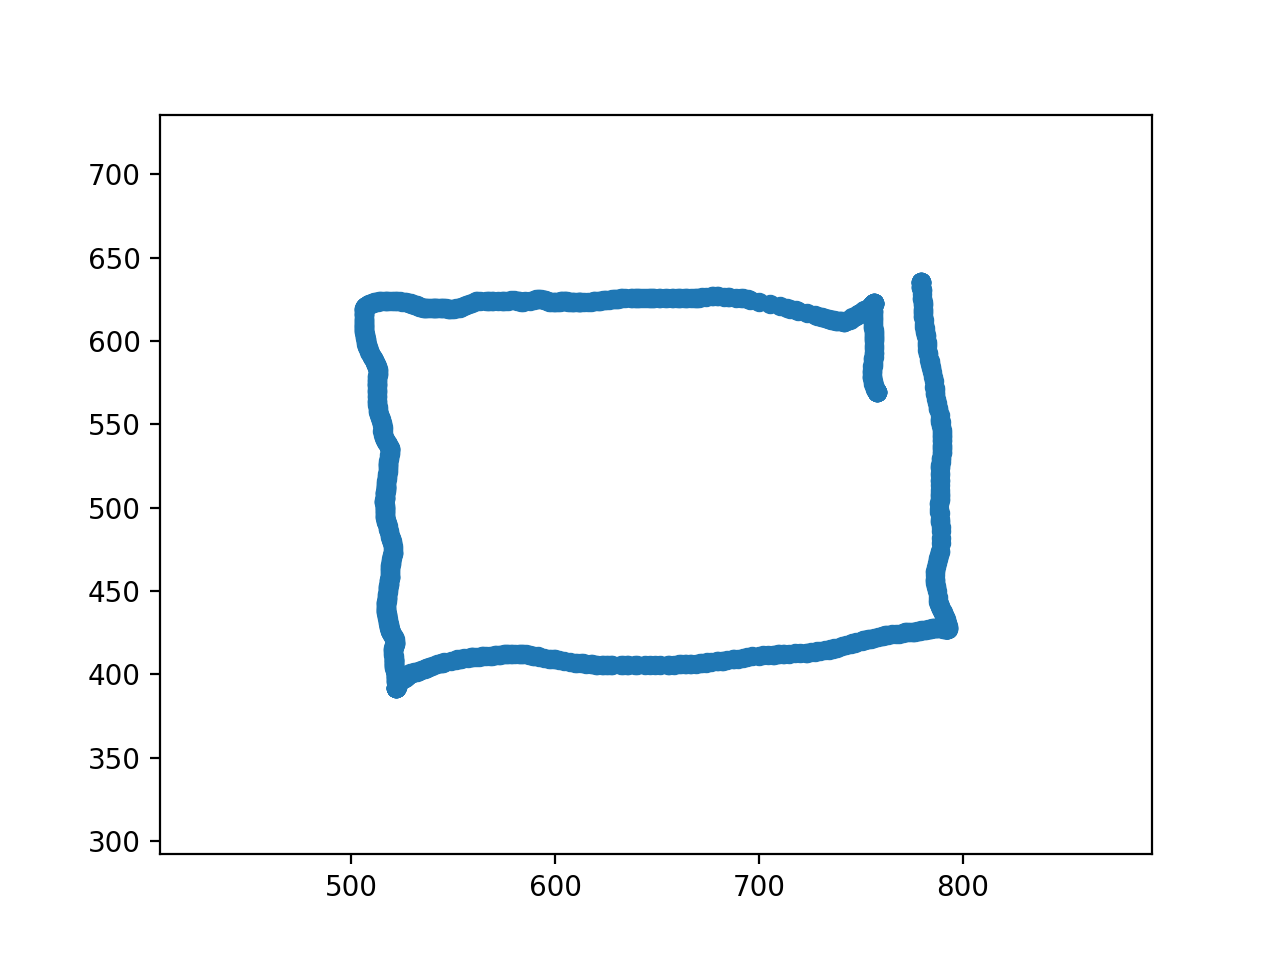

In [38]:
x = df['X']
y = df[' Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df[' Y'].min()-100 , df[' Y'].max() + 100)
graph, = plt.plot([], [], 'o')
graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(df), interval=1)
plt.show()

In [39]:

    dist=[]
    for i in range(0,len(df)-1):
        dist.append(((df.iloc[i,0]-df.iloc[i+1,0])**2+(df.iloc[i,1]-df.iloc[i+1,1])**2)**0.5)
    dist.append(0)
    df['distance']=dist

In [40]:
df

,X,Y,Pressure,TiltX,TiltY,Time,distance
0,758.016399,569.381222,0.088853,-4282.0,2245.0,00:02.7042668,0.217131
1,758.069061,569.170574,0.108629,-4282.0,2245.0,00:02.7198912,0.000000
2,758.069061,569.170574,0.141833,-4011.0,2058.0,00:02.7355150,0.000000
3,758.069061,569.170574,0.170397,-3961.0,2025.0,00:02.7511401,0.000000
4,758.069061,569.170574,0.186267,-3961.0,2025.0,00:02.7667508,0.000000
...,...,...,...,...,...,...,...
1104,779.291835,635.577318,0.761227,-3373.0,1415.0,00:15.7094726,0.000000
1105,779.291835,635.577318,0.754391,-3373.0,1415.0,00:15.7251581,0.000000
1106,779.291835,635.577318,0.745113,-3373.0,1415.0,00:15.7251581,0.000000
1107,779.291835,635.577318,0.737301,-3373.0,1415.0,00:15.7408486,0.000000


### Number of hand liftings

In [41]:
df[' Time'] = df[' Time'].str.slice(3).astype(float)

In [42]:
handLift = 0
i = 0
while i <(len(df)-2):
    i = i+1
    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.5):
        handLift = handLift+1
        print (i)
handLift

0

### Average length of each line

In [46]:
i = 0
k = 0
while i <(len(df)-2):
    i = i+1
    curFirst_x = df.iloc[k,0]
    curFirst_y = df.iloc[k,1]
    curLast_x = df.iloc[i,0]
    curLast_y = df.iloc[i,1]

    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.05):
        first_point = [curFirst_x,curFirst_y]
        last_point = [curLast_x,curLast_y]
        df_pressure = df.iloc[k:i,2:3]
        print("The average pressure is: ", df_pressure.mean())
        distance =df.iloc[k:i,6:7].sum()
        print ("The length of the line is:" ,distance)
        k = i+1

if (handLift == 0):
    first_point = [curFirst_x,curFirst_y]
    last_point = [curLast_x,curLast_y]
    df_pressureLast = df.iloc[i:-1,2:3]
    distanceLast = (df.iloc[0:-1,6:7]).sum()
    print("average pressure is ", df_pressureLast.mean(), "and the lengthh is:" , distanceLast)


average pressure is   Pressure    0.737301
dtype: float64 and the lengthh is: distance    1038.525308
dtype: float64


### How many lines are in the drawing?

In [47]:
i = 0

average_y0 = (df.iloc[0+i,1]+ df.iloc[1+i,1]+df.iloc[2+i,1]+df.iloc[3+i,1]+df.iloc[4+i,1]+df.iloc[5+i,1]+df.iloc[6+i,1]+df.iloc[7+i,1]+df.iloc[8+i,1]+df.iloc[9+i,1])/10
average_y40 = (df.iloc[40+i,1]+ df.iloc[41+i,1]+df.iloc[42+i,1]+df.iloc[43+i,1]+df.iloc[44+i,1]+df.iloc[45+i,1]+df.iloc[46+i,1]+df.iloc[47+i,1]+df.iloc[48+i,1]+df.iloc[49+i,1])/10
average_x0 = (df.iloc[0+i,0]+ df.iloc[1+i,0]+df.iloc[2+i,0]+df.iloc[3+i,0]+df.iloc[4+i,0]+df.iloc[5+i,0]+df.iloc[6+i,0]+df.iloc[7+i,0]+df.iloc[8+i,0]+df.iloc[9+i,0])/10
average_x40 = (df.iloc[40+i,0]+ df.iloc[41+i,0]+df.iloc[42+i,0]+df.iloc[43+i,0]+df.iloc[44+i,0]+df.iloc[45+i,0]+df.iloc[46+i,0]+df.iloc[47+i,0]+df.iloc[48+i,0]+df.iloc[49+i,0])/10

x_dis = average_x0-average_x40
y_dis = average_y0-average_y40

firstGradient = y_dis / x_dis


In [48]:

line =1
i = 1
usedGradient = firstGradient
while i < len(df)-100:
    i = i+1
    average_y0 = (df.iloc[0+i,1]+ df.iloc[1+i,1]+df.iloc[2+i,1]+df.iloc[3+i,1]+df.iloc[4+i,1]+df.iloc[5+i,1]+df.iloc[6+i,1]+df.iloc[7+i,1]+df.iloc[8+i,1]+df.iloc[9+i,1])/10
    average_y40 = (df.iloc[40+i,1]+ df.iloc[41+i,1]+df.iloc[42+i,1]+df.iloc[43+i,1]+df.iloc[44+i,1]+df.iloc[45+i,1]+df.iloc[46+i,1]+df.iloc[47+i,1]+df.iloc[48+i,1]+df.iloc[49+i,1])/10
    average_x0 = (df.iloc[0+i,0]+ df.iloc[1+i,0]+df.iloc[2+i,0]+df.iloc[3+i,0]+df.iloc[4+i,0]+df.iloc[5+i,0]+df.iloc[6+i,0]+df.iloc[7+i,0]+df.iloc[8+i,0]+df.iloc[9+i,0])/10
    average_x40 = (df.iloc[40+i,0]+ df.iloc[41+i,0]+df.iloc[42+i,0]+df.iloc[43+i,0]+df.iloc[44+i,0]+df.iloc[45+i,0]+df.iloc[46+i,0]+df.iloc[47+i,0]+df.iloc[48+i,0]+df.iloc[49+i,0])/10

    x_dis = average_x0-average_x40
    y_dis = average_y0-average_y40

    curGradient = y_dis / x_dis
    if x_dis == 0:
        x_dis = 1
    
    if curGradient - usedGradient >= 5:
        line = line+1
        usedGradient = curGradient
        
line

4

### Is the shape closed?

In [49]:
i = 0
k = 0
while i <(len(df)-2):
    i = i+1
    curFirst_x = df.iloc[k,0]
    curFirst_y = df.iloc[k,1]
    curLast_x = df.iloc[i,0]
    curLast_y = df.iloc[i,1]

    if ((float(df.iloc[i+1,5]) - float(df.iloc[i,5])) > 0.05):
        first_point = [curFirst_x,curFirst_y]
        last_point = [curLast_x,curLast_y]
        if (math.dist(first_point,last_point) <15):
                print("The Shape is Closed")
                quit()
        print(first_point, last_point)
        k = i+1
        
first_point = [curFirst_x,curFirst_y]
last_point = [curLast_x,curLast_y]
print(first_point, last_point)
if (math.dist(first_point,last_point) <15):
    print("The Shape is Closed")
else:
    print("The Shape is Open")

[758.016399122301, 569.381221850098] [779.291835084883, 635.577318397044]
The Shape is Open


Note that our codes worked better for this shape rather than the previous one, this could happen because the shape was easier or the lines were drawn more accuratly.